# Up and Running with TensorFlow
### A basic walkthrough of TensorFlow with Keras (based off the Basic Classification Example at tensorflow.org)

Import necessary libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


Access the fashion MNIST dataset, which deals with various types of clothing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 67s 15us/step


The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:


In [4]:
#We need a list of class names, such that the index maps to the integer value of the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data
It is good practice to explore your data to know what to expect. This borders on data science for really complex and large datasets.

In [5]:
print("Dimensions of training dataset =", train_images.shape)
print("Number of training labels =", len(train_labels))
print("View datatypes of labels:",train_labels)
print("Dimensions of testing dataset =", test_images.shape)
print("Number of testing labels =", len(train_labels))
print("View datatypes of testing labels:",train_labels)

Dimensions of training dataset = (60000, 28, 28)
Number of training labels = 60000
View datatypes of labels: [9 0 0 ... 3 0 5]
Dimensions of testing dataset = (10000, 28, 28)
Number of testing labels = 60000
View datatypes of testing labels: [9 0 0 ... 3 0 5]


### Preprocess the data
Let's inspect the first image

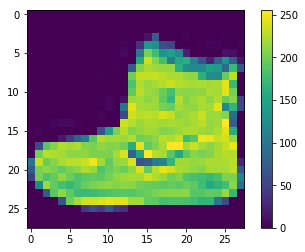

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

We see that the pixel values range from 0 to 255. We'll scale this to a range of 0 to 1 before feeding into the neural network model

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 10 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

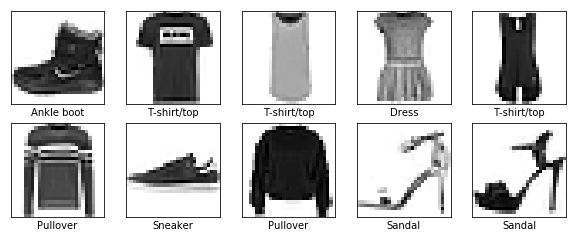

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Build the model
Set up the layers

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

```tf.keras.layers.Flatten``` unpacks 2D arrays into 1D arrays, essentially unrolling the image into an array of pixels
```tf.keras.layers.Dense``` creates densely (fully) connected neural layers
**_relu_** is the rectified linear unit activation function, and **_softmax_** assigns probabilities (summing up to 1) for each output node. The node with the highest probablity is considered the prediction.

### Compile the model

We need a few more settings to compile:
1. Loss function - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
2. Optimizer - This is how the model is updated based on the data it sees and its loss function.
3. Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',#sparse categorical is used for integer values of labels, categorical is used for one-hot encoded labels
             metrics=['accuracy'])

### Train the model

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.5017 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3767 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3367 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3126 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2964 - acc: 0.8909


Evaluate accuracy

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.8687


The test accuracy was a little less than training accuracy. There is a bit of overfitting to our data, but this is not too bad for our purposes today.

## Make Predictions
Let us make predictions on our test data using the model we have trained.

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]#Predictin for first element

array([1.2166557e-06, 8.4244345e-09, 1.1369099e-08, 1.3385702e-08,
       8.3408352e-08, 1.1445072e-02, 4.1906068e-07, 6.1397322e-02,
       2.2289856e-05, 9.2713356e-01], dtype=float32)

Since we used softmax for our last layer, we get an array of 10 probabilities adding up to one. The index with the highest probability is our prediction.

In [18]:
np.argmax(predictions[0])

9

In [20]:
# This index evaluates to Ankle Boots
print("Prediction for first image is",class_names[np.argmax(predictions[0])])

Prediction for first image is Ankle boot


Let's see if this prediction is correct:

In [21]:
print("Actual item at first label is",class_names[test_labels[0]])

Actual item at first label is Ankle boot


### Our prediction was right! The first item is an **Ankle boot**!
Our model should be able to predict all fashion items in the test set with about 87 percent accuracy.You can try out [more examples from the TensorFlow docs](https://www.tensorflow.org/tutorials/)